# Project: Investigate data from The Movies database (TMdb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I selected the TMDb movie dataset from kaggle to perform investigation as part of the project requirements. 

As per the project page, this data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Being a movie buff myself, this is quite an interesting project.


The dataset consists of information like genre, director, cast etc., which help us in analyzing how much each of these variables helped in a movie success. The dataset also consists of other important data like the revenue generated, popularity and average user votes. Based on all these datapoints mentioned above, we can evaluate (1) How successful a Movie is and (2) What has contributed to the success of the movie. Since the data also contains year of release, we can even get a chance to analyze the ongoing trend during a year and how that has helped in the additional success of a movie.

Following are the questions that shall be addressed:
1. Distribution of revenue across popularity levels in the recent years
2. Distribution of revenue across rating levels in the recent years
3. What are the common datapoints for movies with high poularity
4. What are the common datapoints for movies with high voting scores
5. Trends over the years based on Genre
6. Trends over the years based on Keywords
7. Number of movies released year by year

Distributing them across research questions:
Research question #1: Exploring of data
1. Popularity over the years
2. Distribution of revenue across popularity levels in the recent years
3. Distribution of revenue across rating levels in the recent years

Research question #2: Data points (or) Attributes associated with Successful movies
1. What are the common datapoints for movies with high poularity
2. What are the common datapoints for movies with high voting scores

Research question #3: Top trends (genre, keywords) over years
1. Number of movies released year by year
2. Trends over the years based on Genre
3. Trends over the years based on Keywords


In [1]:
# loading the required libraries to perform the required actions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
% matplotlib inline

pd.set_option('mode.chained_assignment', None)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Importing the dataset
data = pd.read_csv('tmdb-movies.csv')

# Displaying the first two rows of data
data.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# List the available columns for general understanding of the data points we have per movie

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


As observed, we were provided with about 21 different data points per movie and a huge list of 10866 movies in total. 
From the data points provided, for the selected questions to answer, we do not need several datapoints like tagline or homepage or overview etc., which can be dropped from the dataset.

Not all data points have values for all movies. As observed, cast (10790), homepage (2936), director (10822), tagline (8042), keywords (9373), genre (10843) and production_companies (9836) all of these have entries less than the total movie count. These all have several entries will NULLs. Since null columns effect the analyses, the dataset needs to be carefully considered with all the resepective entries present.

Out of the list, cast (10790), director (10822) and genre (10843) have very less missing data and these movies that have missed cast, director and genre can be safely removed from the dataset.

In [4]:
# describe the data and collect some statistics about the data
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



As observed budget and revenue has minimum, 25% and 50% percentile data to be 0. Since it is not practical to have zero budget or revenue, the data might not be enough reliable when considering budget and revenue. Revenue could be zero however, if the movie is not relased, however, the min value of release_year points to 1960 which means all the movies in the database are released at some point of time. Interestingly, min value of runtime is zero as well, which could not be a possibility.

So far we know the following:
1. Budget of 0.00 cannot be a possibility and this is definitely a missing data 
2. 50% (or more) of the Budget data is 0.00, so we cannot delete this data as our sample size becomes very small.
3. Revenue of 0.00 can be a possibility but since all movies have a release date, revenue also has missing data
4. 50% (or more) of the Revenue data is 0.00, so we cannot delete this data
5. Runtime of 0 is not possible but we need to further analyze if this is true or missing data.

In [5]:
# Check for details about movies that have runtime of zero

runtime_data = data.query('runtime == 0')
runtime_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.0,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.0,0.0


Printing three rows from the data where runitme is zero. If we take the first entry "Mythica: The Necromancer", it is observed at http://watch.arrowstormentertainment.com/ that, the actual runtime is 95 minutes. So this is again a missing data and not actual data. 

Also, for all these three movies, their budget (and revenue) values are zero which is again not actual data. To limit the dataset to correct data and reduce missing data as much as possible, we can consider to remove movies that have a revenue of zero provided provided the budget is also zero for these entries and number of such movies is quite little compared to the actual data size. 

Lets see how many movies have both runtime and budget as zero

In [6]:
# Count number of movies whose runtime and budget values are both zero
number_of_zero_runtime_movies =  (data.groupby(['runtime', 'budget']).count()['id'])
number_of_zero_runtime_movies.head(5)

runtime  budget 
0        0          28
         2000000     1
         3250000     1
         6000000     1
2        0           5
Name: id, dtype: int64


It is observed that, about 31 movies have a runtime of zero of which 28 have even a budget of zero. So we can safely discard this data from our dataset. Since there are only 3 additional rows with runtime of zero but budget not zero, we could drop them too as runtime of zero doesn't make any sense eitherways.

Lets now find if there are any duplicate rows in the given data.

In [7]:
# Find duplicated entries
data[data.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0





There is only one duplicate found. Lets see how many times it might have actually duplicated.



In [8]:
# Bring all the rows that have an IMDB ID of tt0411951 as IMDB ID per movie will be unique 
tekken_data = data.query('imdb_id == "tt0411951"')
tekken_data

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Data Cleaning based on the analysis

1. We drop duplicates
2. We delete columns that are not required for answering the above mentioned queries (imdb_id, homepage, tagline, overview, budget_adj and revenue_adj)
3. Drop movies whose runtime is zero and budget is zero (Since there are only 3 additional rows with runtime of zero but budget not zero, we could drop them too as runtime of zero doesn't make any sense eitherways, so we drop all movies with runtime of zero).
4. Drop NULL valued columns for cast (10790), director (10822) and genre (10843) as the number of missing ones are limited.
5. Replace zero valued columns with null values in the budget and revenue columns (as we cannot delete them and do not want the 0's to effect our analysis).

In [9]:
# 1. Drop duplicates
data.drop_duplicates(inplace=True)

In [10]:
# Confirm the deletion of duplicates: Total number of rows should be -1 from the actual total of 10866
data.count()[0]

10865

In [11]:
# 2. Delete columns that we do not require for answering and aforementioned queries.
columns_to_drop = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj']
data.drop(columns_to_drop, axis=1, inplace=True)

In [12]:
# Confirm that the columns are successfully deleted. There should be only 15 columns out of 21
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.3+ MB


In [13]:
# 3. Drop movies whose rutime is zero
data.query('runtime != 0', inplace=True)

In [14]:
# Confirm that movies whose runtime is zero are no longer present in the dataset. The result should display no rows.
data.query('runtime == 0')

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [15]:
# 4. Drop NULL valued columns for cast (10790), director (10822) and genre (10843)
columns_to_drop_null_values = ['cast', 'director', 'genres']
data.dropna(subset=columns_to_drop_null_values, how='any', inplace=True)

In [16]:
# Confirm that null valued columns for cast, director and genre are dropped. For cast, director and genre the sum should be zero.
data.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1410
runtime                    0
genres                     0
production_companies     944
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [17]:
# 5. Replace zero valued columns with null values in the budget and revenue columns
data['budget'] = data['budget'].replace(0, np.NaN)
data['revenue'] = data['revenue'].replace(0, np.NaN)

In [18]:
# Confirm that 0's are replaced with NULL values in budget and revenue columns. 
# The count for budget and revenue must be equal to the total entry count (here it is 10703)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 15 columns):
id                      10703 non-null int64
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null int64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null object
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB



After the clean up, we are finally left with 10703 rows of data with 15 columns each. It was not a complete cleanup of rows holding NULL values in some columns like (production_companies, keywords, budget and revenue), however the data is still useful. For production_companies and keywords though, the NULL value percentage is not very high.

In [19]:
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10703.000000,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000,10703.000000
mean,64904.988321,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355
std,91161.996308,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,0.930155,12.825920
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10538.500000,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20235.000000,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73637.000000,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000



Since we replaced zero values to null values in budget and revenue data, both distribution of budget and revenue are better compared to zero.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question #1: Exploring of data

1. Popularity over the years
2. Distribution of revenue across popularity levels in the recent years
3. Distribution of revenue across rating levels in the recent years

#### Question 1: Popularity over the years
Compute the mean of popularity per year and see the trends by plotting the lines. While 75 percentile of popularity is still under 1, there is a max of 32.98 which can tell presence of outliers in this diata, so median as well is computed.

In [20]:
# Calculate mean of popularity and display the data of recent years
popularity_mean = data.groupby('release_year').mean()['popularity']
popularity_mean.tail()

release_year
2011    0.685607
2012    0.620326
2013    0.639309
2014    0.910027
2015    1.055081
Name: popularity, dtype: float64

In [21]:
# Calculate median of popularity and display the data of recent years
popularity_median = data.groupby('release_year').median()['popularity']
popularity_median.tail()

release_year
2011    0.420930
2012    0.344263
2013    0.356506
2014    0.383337
2015    0.407396
Name: popularity, dtype: float64

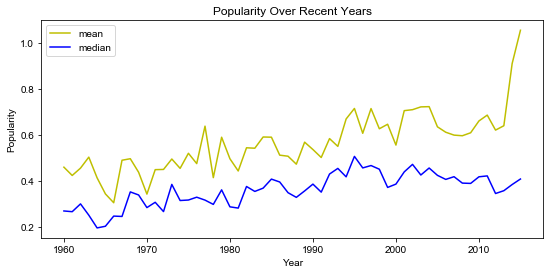

In [22]:
# Data for x-axis and y-axis

# index for x-axis
popularity_mean_index = popularity_mean.index
popularity_median_index = popularity_median.index

# x1, y1 for mean data
x1, y1 = popularity_mean_index, popularity_mean

# x2, y2 for median data
x2, y2 = popularity_median_index, popularity_median

# Plot Size
plt.figure(figsize=(9, 4))

# Plot line chart for mean and median
plt.plot(x1, y1, color = 'y', label = 'mean')
plt.plot(x2, y2, color = 'b', label = 'median')

# Plot title and labels
plt.title('Popularity Over Recent Years')
plt.xlabel('Year')
plt.ylabel('Popularity');

# Setup Legend
plt.legend(loc='upper left')

# Plot style
sns.set_style('whitegrid')



There is an increse in trend as observed from the popularity plot above. While the popularity mean has shot up in the latest year, population medium stayed smooth. However, the population median stayed almost the same over the recent years. 


#### Question: 2 The distribution of popularity in different revenue levels in recent years.

The popularity in differnt revenue levels may be effected widely owing to the internet streaming, inflation etc.,. So it is difficult to infer any analysis on the trend of revenue. However, we can try categorizing revenue into several levels and see how the popularity falls across those levels. 

Lets divide revenue according to their quartile:

In [23]:
# Define few functions and variables to reuse

# Function for categorizing revenue into per quantile
def categorize_per_quantile(data, column_name):
    
    # Find min and max values
    min_value = data[column_name].min()
    max_value = data[column_name].max()
    
    # Find quartiles
    first_quantile = data[column_name].describe()[4]
    second_quantile = data[column_name].describe()[5]
    third_quantile = data[column_name].describe()[6]
    
    # Bin edges that will be used to "cut" the data into groups
    bin_edges = [min_value, first_quantile, second_quantile, third_quantile, max_value]
 
    # Labels for the four levels
    bin_names = ['Low', 'Medium', 'High', 'Very High'] 

    # Creates a new new column and put the categorized data into it
    name = '{}_levels'.format(column_name)
    data[name] = pd.cut(data[column_name], bin_edges, labels=bin_names, include_lowest=True)
    
    # return categorized data
    return data


# Select recent five years 
years = [2011, 2012, 2013, 2014, 2015]


def generate_categorization(datapoint):
    # Create an empty dataframe
    loc_data = pd.DataFrame()

    # For each year, perform the following actions
    for year in years:
        # Prepare yearly dataframes
        selected_year = data.query('release_year == "%s"' % year)
    
        # Apply the categorization
        categorized_data = categorize_per_quantile(selected_year, datapoint) 
    
        # Append the data into final_data
        loc_data = loc_data.append(categorized_data)
        
    # Return the categorized dataframe
    return loc_data

# Plotting a bar chart using the final_data_summary dataframe
width = 0.2 

# Labels for the four budget level groups
categories = ['Low', 'Medium', 'High', 'Very High'] 

# Colors
# colors = ['#EE3224', '#F78F1E', '#FFC222', '#4fb427']
colors = ['r', 'b', 'y', 'g']

# Create a function to plot bars. This function generates graph while keeping revenue_
def plot_bars(position, category, color, datapoint): 
    # Create a bar at position pos,
    plt.bar(position, 
        # for 'Low',
        final_summary.query('revenue_levels =="'+category+'"')[datapoint], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color=color, 
        # with label Low
        label=category)

# Setup the plot labels and additional details        
def setup_plot_additional_details(axes, name, description, position):        
    # Set the y axis label
    axes.set_ylabel(name)

    # Set the chart's title
    axes.set_title(description)

    # Set the position of the x ticks
    axes.set_xticks([p + 1.5 * width for p in position])

    # Set the labels for the x ticks
    axes.set_xticklabels([2011, 2012, 2013, 2014, 2015])


In [24]:
final_data = generate_categorization('revenue')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3035 entries, 3371 to 628
Data columns (total 16 columns):
id                      3035 non-null int64
popularity              3035 non-null float64
budget                  1227 non-null float64
revenue                 1143 non-null float64
original_title          3035 non-null object
cast                    3035 non-null object
director                3035 non-null object
keywords                2385 non-null object
runtime                 3035 non-null int64
genres                  3035 non-null object
production_companies    2703 non-null object
release_date            3035 non-null object
vote_count              3035 non-null int64
vote_average            3035 non-null float64
release_year            3035 non-null int64
revenue_levels          1143 non-null category
dtypes: category(1), float64(4), int64(4), object(7)
memory usage: 382.5+ KB


In [25]:
# Group dataframe we created above with each revenue levels in each year
final_summary = final_data.groupby(['release_year','revenue_levels']).median()
final_summary.tail(4)

id  popularity      budget      revenue  \
release_year revenue_levels                                                  
2015         Low             301284.0    0.506000   7500000.0     228615.0   
             Medium          272606.5    0.921828  13000000.0   11893552.5   
             High            273980.0    1.750452  19000000.0   61365324.5   
             Very High       253770.0    3.923328  81000000.0  244935102.0   

                             runtime  vote_count  vote_average  
release_year revenue_levels                                     
2015         Low                98.5        79.5          5.85  
             Medium            105.0       242.5          6.15  
             High              108.0       614.5          6.40  
             Very High         117.0      1576.5          6.50

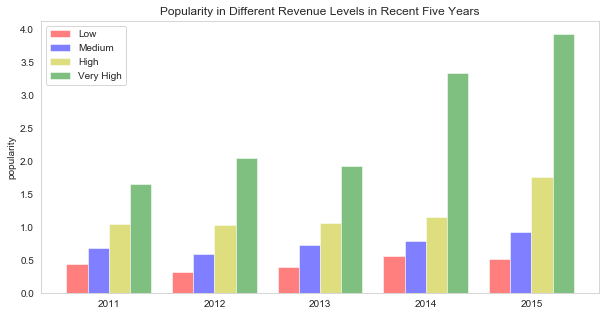

In [26]:
# Plot the bars for popularity

# Bar graph positions and width
pos = list(range(len(final_summary.query('revenue_levels == "Low"'))))
fig, ax = plt.subplots(figsize=(10,5))
    
for index, category in enumerate(categories):
        plot_bars([p + width*index for p in pos], category, colors[index], 'popularity')


setup_plot_additional_details(ax, 'popularity', 'Popularity in Different Revenue Levels in Recent Five Years', pos)

# Adding the legend and showing the plot
plt.legend( loc='upper left')
plt.grid()
plt.show()

In the last five years, as analogous, we can infer that revenue is directly proportional with popularity. Movies with high popularity resulted in higher revenue.

#### Question 3: The distribution of revenue in different score rating levels in recent five years.

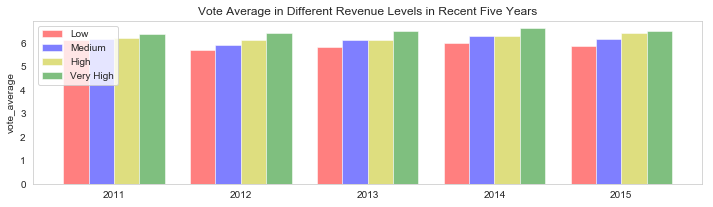

In [27]:
# Plotting a bar chart using the final_data_summary dataframe

# Bar graph positions and width
pos = list(range(len(final_summary.query('revenue_levels == "Low"'))))
width = 0.2 

# Plotting the bars
fig, ax_va = plt.subplots(figsize=(12,3))

for index, category in enumerate(categories):
        plot_bars([p + width*index for p in pos], category, colors[index], 'vote_average')


setup_plot_additional_details(ax_va, 'vote_average', 'Vote Average in Different Revenue Levels in Recent Five Years', pos)



# Adding the legend and showing the plot
plt.legend( loc='upper left')
plt.grid()
plt.show()

From the chart above, we can see that there is not much difference across revenue levels in terms of vote average. So it can be inferred that high revenue doesn't attract high votes.


#### Research 1: Exploration Summary

From this assessment, we inferred that movie popularity trend is growing since inception (of this data). Higher popularity accounted to higher revenue levels or vice versa in recent five years. However, the vote_average has shown little effect on the revenue generated.

### Research Question 2 - Data points (or) Attributes associated with Successful movies

#### 1. What are the common datapoints for movies with high poularity
#### 2. What are the common datapoints for movies with high voting scores



### Question 1: What are the common datapoints for movies with high poularity

To answer this question, we take the following attributes of the movie:
- budget
- cast
- director
- keywords
- runtime
- genres
- production companies. 

The data provided by these attributes can be divided into two types:

1. Quantitative data (dynamic data)
- runtime
- budget

The runtime and budget data can be divided into four levels according to their quartiles: 'Low', 'Medium', 'High', 'Very High' across all the years of data provided. After the categorization is done, we can observe in which budget and revenue level does the successful movies (higher popularity and voting scores) fall into.


2. Categorical data (static data)
- cast
- director
- keywords
- genres
- production companies

We filter top 5% of movies based on their popularity and high voting scores. From the top 5% dataset, we try to find prominent cast, director etc for their frequency in occurrance. We also filter low 5% of movies on their least popularity and low voting scores and try to match the frequency in occurrances of cast, director etc., and try to filter them from the top 5%.

##### Preparation: Setup functions and Prepare data for analysis

###### Setup functions

In [28]:
# Prepare some functions and variables for reuse

# Split pipe characters and return first few as per the requirement
# num - the number of entries requrired to be returned after splitting
def find_top_few(dataframe_col, num=3):
    # split the characters in the input column and make it to a list
    split_data = dataframe_col.str.cat(sep='|').split('|')
    
    # save split_data it to a dataframe
    new_data = pd.DataFrame({'top' :split_data})

    # count their number of occurrences and choose the first few as per the argument
    top_few = new_data['top'].value_counts().head(num)
    
    # return top_few dataframe
    return top_few

# number of entries
count = len(data.index.astype(int))
five_percent = int(count*5/100)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 15 columns):
id                      10703 non-null int64
popularity              10703 non-null float64
budget                  5150 non-null float64
revenue                 4843 non-null float64
original_title          10703 non-null object
cast                    10703 non-null object
director                10703 non-null object
keywords                9293 non-null object
runtime                 10703 non-null int64
genres                  10703 non-null object
production_companies    9759 non-null object
release_date            10703 non-null object
vote_count              10703 non-null int64
vote_average            10703 non-null float64
release_year            10703 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


###### Prepare data for analysis consisting of top 5% movies based on popularity, revenue and rating

In [30]:
# Select top 5% movies that are most popular

# Sort data by release year in ascending order and popularity in descending order
top_popular_movies = data.sort_values(['release_year','popularity'], ascending=[True, False])

# Group by year and choose the top 5%
top_popular_movies = top_popular_movies.groupby('release_year').head(five_percent).reset_index(drop=True)

# Confirm that the data has the first entries starting with year 1960 (as we sorted by release_year ascending)
top_popular_movies.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960


In [31]:
# Select top 5% movies that generated high revenue.

# Sort data by release year in ascending order and revenue in descending order
top_revenue_movies = data.sort_values(['release_year','revenue'], ascending=[True, False])

# Group by year and choose the top 5%
top_revenue_movies = top_revenue_movies.groupby('release_year').head(five_percent).reset_index(drop=True)

# Confirm that the data has the first entries starting year 1960
top_revenue_movies.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,967,1.136943,12000000.0,60000000.0,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,gladiator|roman empire|gladiator fight|slavery...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960
1,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960


In [32]:
# Select top 5% highly rated movies.

# Sort data by release year in ascending order and vote_average in descending order
top_rated_movies = data.sort_values(['release_year','vote_average'], ascending=[True, False])

# Group by year and choose the top 5%
top_rated_movies = top_rated_movies.groupby('release_year').head(five_percent).reset_index(drop=True)

# Confirm that the data has the first entries starting year 1960
top_rated_movies.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,284,0.947307,3000000.0,25000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960


###### Prepare data for analysis consisting of bottom 5% movies based on popularity, revenue and rating

In [33]:
# Select bottom 5% least popular movies.
least_popular_movies = data.sort_values(['release_year','popularity'], ascending=[True, True])
least_popular_movies = least_popular_movies.groupby('release_year').head(five_percent).reset_index(drop=True)

# Select bottom 5% lowest revenue movies
lowest_revenue_movies = data.sort_values(['release_year','revenue'], ascending=[True, True])
lowest_revenue_movies = lowest_revenue_movies.groupby('release_year').head(five_percent).reset_index(drop=True)

# Select bottom 5% least rated movies.
least_rated_movies = data.sort_values(['release_year','vote_average'], ascending=[True, True])
least_rated_movies = least_rated_movies.groupby('release_year').head(five_percent).reset_index(drop=True)


##### Answering the question: What attributes are associated with movies that have high popularity?
To answer these, we shall answer the following three questions:
1. Which budget category movies are associated with movies that have high popularity?
2. Which runtime category movies are associated with movies that have high popularity on average?
3. What other categorical attributes are associated with high popularity?



*Answering: Which budget category movies are associated with movies that have high popularity?*

Budget data is divided into four levels with quartiles: 'Low', 'Medium', 'High', 'Very High' and create a level column.

In [34]:
# Generate budget into categories
budget_data = categorize_per_quantile(data,'budget')

# Test that budget_levels column is created and categorized
budget_data['budget_levels'].head(2)

0    Very High
1    Very High
Name: budget_levels, dtype: category
Categories (4, object): [Low < Medium < High < Very High]

In [35]:
# Find the mean popularity of each level with groupby
budget_mean = budget_data.groupby('budget_levels')['popularity'].mean()
budget_mean

budget_levels
Low          0.510678
Medium       0.726490
High         0.988660
Very High    1.821742
Name: popularity, dtype: float64

In [36]:
# Find the median popularity of each level with groupby
budget_median = budget_data.groupby('budget_levels')['popularity'].median()
budget_median

budget_levels
Low          0.367621
Medium       0.507987
High         0.733975
Very High    1.232098
Name: popularity, dtype: float64

In [37]:
# Prepare the x locations for the generated groups
ind = np.arange(len(budget_mean))  

# the width of the bars
width = 0.5       

ind

array([0, 1, 2, 3])

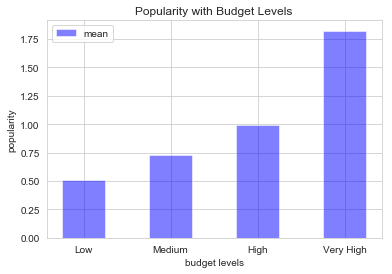

In [38]:
# Plot

# Set style
sns.set_style('whitegrid')
bars = plt.bar(ind, budget_mean, width, color='b', alpha=0.5, label='mean')

# Title and Labels
plt.ylabel('popularity')
plt.xlabel('budget levels')
plt.title('Popularity with Budget Levels')
locations = ind
labels = budget_mean.index  
plt.xticks(locations, labels)

# legend
plt.legend()


###### From the plot we can infer that movies with higher budget level accounted to higher popularity. Budget may be in heavy casting, costly setup, higher marketing costs etc., which all can contribute to popularity of a movie.


*Answering: Which runtime category movies are associated with movies that have high popularity on average?*

Runtime data is divided into four levels with quartiles: 'Low', 'Medium', 'High', 'Very High' and create a level column.

In [39]:
# Generate runtime into categories
runtime_data = categorize_per_quantile(data,'runtime')

# Test that runtime column is created and categorized
runtime_data['runtime_levels'].head(2)

0    Very High
1    Very High
Name: runtime_levels, dtype: category
Categories (4, object): [Low < Medium < High < Very High]

In [40]:
# Find the mean runtime of each level with groupby
runtime_mean = runtime_data.groupby('runtime_levels')['popularity'].mean()
runtime_mean

runtime_levels
Low          0.418723
Medium       0.551560
High         0.656342
Very High    1.019749
Name: popularity, dtype: float64

In [41]:
# Find the median runtime of each level with groupby
runtime_median = runtime_data.groupby('runtime_levels')['popularity'].median()
runtime_median

runtime_levels
Low          0.290399
Medium       0.366125
High         0.420568
Very High    0.529933
Name: popularity, dtype: float64

In [42]:
# Prepare the x locations for the generated groups
ind = np.arange(len(runtime_median))  

# the width of the bars
width = 0.5       

ind

array([0, 1, 2, 3])

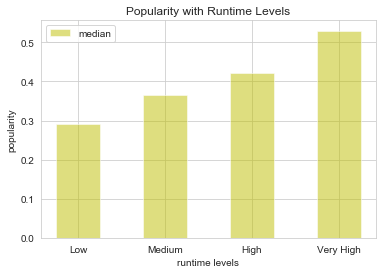

In [43]:
# Plot

# Set style
sns.set_style('whitegrid')
bars = plt.bar(ind, runtime_median, width, color='y', alpha=0.5, label='median')

# Title and Labels
plt.ylabel('popularity')
plt.xlabel('runtime levels')
plt.title('Popularity with Runtime Levels')
locations = ind
labels = runtime_median.index  
plt.xticks(locations, labels)

# legend
plt.legend()


###### From the plot we can infer that movies with high runtime have accounted to high popularity. 


*Answering: What other categorical attributes are associated with high popularity?*

We start analysis with dataframe: top_popular_movies. It is the dataframe with top 5% popular movies.

In [44]:
top_popular_movies.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960


Select the five highest occurrences in each category among the top 5% popular movies and store into temporary summary tables

In [45]:
# Find top five cast occurrences
cast_occurrences = find_top_few(top_popular_movies.cast, 5)

# Find top five director occurrences
director_occurrences = find_top_few(top_popular_movies.director, 5)

# Find top five keyword occurrences
keyword_occurrences = find_top_few(top_popular_movies.keywords, 5)

# Find top five genres occurrences
genre_occurrences = find_top_few(top_popular_movies.genres, 5)

# Find top five production companies occurrences
production_occurrences = find_top_few(top_popular_movies.production_companies, 5)

Create a summary table

In [46]:
#Use the result above to create a summary dataframe.
popular_summary = pd.DataFrame({'popular_cast': cast_occurrences.index, 
                                'popular_director': director_occurrences.index, 
                                'popular_keywords': keyword_occurrences.index, 
                                'popular_genres': genre_occurrences.index, 
                                'popular_producer': production_occurrences.index})
popular_summary

,popular_cast,popular_director,popular_keywords,popular_genres,popular_producer
0,Samuel L. Jackson,Woody Allen,independent film,Drama,Universal Pictures
1,Robert De Niro,Clint Eastwood,woman director,Comedy,Warner Bros.
2,Bruce Willis,Steven Spielberg,based on novel,Thriller,Paramount Pictures
3,Nicolas Cage,Martin Scorsese,sex,Action,Twentieth Century Fox Film Corporation
4,Michael Caine,Ridley Scott,sport,Romance,Columbia Pictures


In [47]:
top_popular_movies.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,966,1.872132,2000000.0,4905000.0,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,horse|village|friendship|remake|number in title,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960


Find the five most occurrences in each category among the 5% of unpopular movies.

In [48]:
least_popular_movies.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,18973,0.055821,3000000.0,7100000.0,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,NaN,91,Comedy|Romance,Paramount Pictures|Jerry Lewis Productions,12/18/60,13,7.2,1960
1,39890,0.065808,NaN,NaN,The City of the Dead,Christopher Lee|Dennis Lotis|Patricia Jessel|T...,John Llewellyn Moxey,witch|burning of witches|witch burning|witchcraft,76,Horror,Vulcan Productions Inc.,9/9/60,13,6.1,1960


In [49]:
# Find bottom five cast occurrences
cast_occurrences = find_top_few(least_popular_movies.cast, 5)

# Find bottom five director occurrences
director_occurrences = find_top_few(least_popular_movies.director, 5)

# Find bottom five keyword occurrences
keyword_occurrences = find_top_few(least_popular_movies.keywords, 5)

# Find bottom five genres occurrences
genre_occurrences = find_top_few(least_popular_movies.genres, 5)

# Find bottom five production companies occurrences
production_occurrences = find_top_few(least_popular_movies.production_companies, 5)

Create a summary table

In [50]:
#Use the result above to create a summary dataframe.
unpopular_summary = pd.DataFrame({'unpopular_cast': cast_occurrences.index, 
                                'unpopular_director': director_occurrences.index, 
                                'unpopular_keywords': keyword_occurrences.index, 
                                'unpopular_genres': genre_occurrences.index, 
                                'unpopular_producer': production_occurrences.index})
unpopular_summary

,unpopular_cast,unpopular_director,unpopular_keywords,unpopular_genres,unpopular_producer
0,Robert De Niro,Woody Allen,woman director,Drama,Universal Pictures
1,Samuel L. Jackson,Clint Eastwood,independent film,Comedy,Warner Bros.
2,Nicolas Cage,Martin Scorsese,sex,Thriller,Paramount Pictures
3,Bruce Willis,Steven Spielberg,based on novel,Action,Twentieth Century Fox Film Corporation
4,Robin Williams,Steven Soderbergh,sport,Romance,Columbia Pictures


In [51]:
popular_summary

,popular_cast,popular_director,popular_keywords,popular_genres,popular_producer
0,Samuel L. Jackson,Woody Allen,independent film,Drama,Universal Pictures
1,Robert De Niro,Clint Eastwood,woman director,Comedy,Warner Bros.
2,Bruce Willis,Steven Spielberg,based on novel,Thriller,Paramount Pictures
3,Nicolas Cage,Martin Scorsese,sex,Action,Twentieth Century Fox Film Corporation
4,Michael Caine,Ridley Scott,sport,Romance,Columbia Pictures


The following can be inferred from the data considered from popular and unpopular:

**Cast associated with highly popular movies**: Robin Williams

**Director associated with highly popular movies**: Steven Soderbergh

**Genres associated with highly popular movies**: All genres present in top 5% are present in bottom 5%.

**Keywords associated with highly popular movies**: All keywords present in top 5% are present in bottom 5%.

**Producer associated with highly popular movies**: All producers present in top 5% are present in bottom 5%


### Question 2: What are the common datapoints for movies with high voting scores

1. Which budget category movies are associated with movies that have high voting scores?
2. Which runtime category movies are associated with movies that have high voting scores on average?
3. What other categorical attributes are associated with high voting scores?



*Answering: Which budget category movies are associated with movies that have high voting scores?*

Budget data is divided into four levels with quartiles: 'Low', 'Medium', 'High', 'Very High' and create a level column.


In [52]:
# Generate budget into categories
budget_data = categorize_per_quantile(data,'budget')

# Test that budget_levels column is created and categorized
budget_data['budget_levels'].head(2)

0    Very High
1    Very High
Name: budget_levels, dtype: category
Categories (4, object): [Low < Medium < High < Very High]

In [53]:
# Find the mean voting average of each level with groupby
budget_mean = budget_data.groupby('budget_levels')['vote_average'].mean()
budget_mean

budget_levels
Low          5.947569
Medium       6.016922
High         6.066133
Very High    6.104504
Name: vote_average, dtype: float64

In [54]:
# Find the median voting average of each level with groupby
budget_median = budget_data.groupby('budget_levels')['vote_average'].median()
budget_median

budget_levels
Low          6.0
Medium       6.1
High         6.1
Very High    6.1
Name: vote_average, dtype: float64

In [55]:
# Prepare the x locations for the generated groups
ind = np.arange(len(budget_mean))  

# the width of the bars
width = 0.5       

ind

array([0, 1, 2, 3])

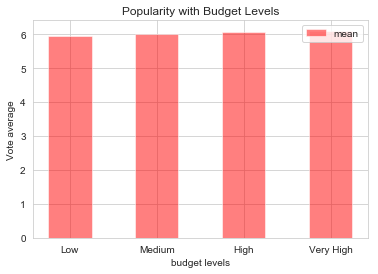

In [56]:
# Plot

# Set style
sns.set_style('whitegrid')
bars = plt.bar(ind, budget_mean, width, color='r', alpha=0.5, label='mean')

# Title and Labels
plt.ylabel('Vote average')
plt.xlabel('budget levels')
plt.title('Popularity with Budget Levels')
locations = ind
labels = budget_mean.index  
plt.xticks(locations, labels)

# legend
plt.legend()


###### From the plot we can infer that movies with higher budget level have no effect on vote averages. 


*Answering: Which runtime category movies are associated with movies that have high vote averages?*

Runtime data is divided into four levels with quartiles: 'Low', 'Medium', 'High', 'Very High' and create a level column.

In [57]:
# Generate runtime into categories
runtime_data = categorize_per_quantile(data,'runtime')

# Test that runtime column is created and categorized
runtime_data['runtime_levels'].head(2)

0    Very High
1    Very High
Name: runtime_levels, dtype: category
Categories (4, object): [Low < Medium < High < Very High]

In [58]:
# Find the mean runtime of each level with groupby
runtime_mean = runtime_data.groupby('runtime_levels')['vote_average'].mean()
runtime_mean

runtime_levels
Low          5.726425
Medium       5.724355
High         6.044946
Very High    6.401297
Name: vote_average, dtype: float64

In [59]:
# Find the median runtime of each level with groupby
runtime_median = runtime_data.groupby('runtime_levels')['vote_average'].median()
runtime_median

runtime_levels
Low          5.8
Medium       5.8
High         6.1
Very High    6.4
Name: vote_average, dtype: float64

In [60]:
# Prepare the x locations for the generated groups
ind = np.arange(len(runtime_median))  

# the width of the bars
width = 0.5       

ind

array([0, 1, 2, 3])

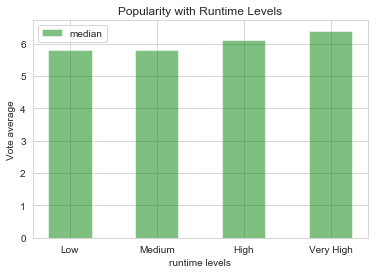

In [61]:
# Plot

# Set style
sns.set_style('whitegrid')
bars = plt.bar(ind, runtime_median, width, color='g', alpha=0.5, label='median')

# Title and Labels
plt.ylabel('Vote average')
plt.xlabel('runtime levels')
plt.title('Popularity with Runtime Levels')
locations = ind
labels = runtime_median.index  
plt.xticks(locations, labels)

# legend
plt.legend()


###### From the plot we can infer that movies with high runtime have little or no effect on vote average. 


*Answering: What other categorical attributes are associated with high vote averages?*

We start analysis with dataframe: top_rated_movies. It is the dataframe with top 5% high rated movies.

In [62]:
top_rated_movies.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,539,2.610362,806948.0,32000000.0,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,hotel|clerk|arizona|shower|rain,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960
1,284,0.947307,3000000.0,25000000.0,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,new york|new year's eve|lovesickness|age diffe...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960


Select the five highest occurrences in each category among the top 5% vote average movies and store into temporary summary tables

In [63]:
# Find top five cast occurrences
cast_occurrences = find_top_few(top_rated_movies.cast, 5)

# Find top five director occurrences
director_occurrences = find_top_few(top_rated_movies.director, 5)

# Find top five keyword occurrences
keyword_occurrences = find_top_few(top_rated_movies.keywords, 5)

# Find top five genres occurrences
genre_occurrences = find_top_few(top_rated_movies.genres, 5)

# Find top five production companies occurrences
production_occurrences = find_top_few(top_rated_movies.production_companies, 5)

In [64]:
#Use the result above to create a summary dataframe.
top_vote_average_summary = pd.DataFrame({'popular_cast': cast_occurrences.index, 
                                         'popular_director': director_occurrences.index, 
                                         'popular_keywords': keyword_occurrences.index, 
                                         'popular_genres': genre_occurrences.index, 
                                         'popular_producer': production_occurrences.index})
top_vote_average_summary

,popular_cast,popular_director,popular_keywords,popular_genres,popular_producer
0,Robert De Niro,Woody Allen,independent film,Drama,Universal Pictures
1,Samuel L. Jackson,Clint Eastwood,woman director,Comedy,Warner Bros.
2,Bruce Willis,Martin Scorsese,based on novel,Thriller,Paramount Pictures
3,Nicolas Cage,Steven Spielberg,sex,Action,Twentieth Century Fox Film Corporation
4,Michael Caine,Ridley Scott,sport,Romance,Columbia Pictures


Find the five most occurrences in each category among the 5% of least vote average movies.

In [65]:
least_rated_movies.head(2)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,24014,0.875173,NaN,NaN,Let's Make Love,Marilyn Monroe|Yves Montand|Tony Randall|Frank...,George Cukor,musical,114,Comedy|Romance,Twentieth Century Fox Film Corporation|The Com...,10/7/60,15,4.9,1960
1,6643,0.421043,NaN,NaN,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,John Huston,indian|texas|farm|siblings|saddle,125,Action|Drama|Western,James Productions,1/1/60,17,4.9,1960


In [66]:
# Find bottom five cast occurrences
cast_occurrences = find_top_few(least_rated_movies.cast, 5)

# Find bottom five director occurrences
director_occurrences = find_top_few(least_rated_movies.director, 5)

# Find bottom five keyword occurrences
keyword_occurrences = find_top_few(least_rated_movies.keywords, 5)

# Find bottom five genres occurrences
genre_occurrences = find_top_few(least_rated_movies.genres, 5)

# Find bottom five production companies occurrences
production_occurrences = find_top_few(least_rated_movies.production_companies, 5)

Create a summary table

In [67]:
#Use the result above to create a summary dataframe.
low_vote_average_summary = pd.DataFrame({'unpopular_cast': cast_occurrences.index, 
                                         'unpopular_director': director_occurrences.index, 
                                         'unpopular_keywords': keyword_occurrences.index, 
                                         'unpopular_genres': genre_occurrences.index, 
                                         'unpopular_producer': production_occurrences.index})
low_vote_average_summary

,unpopular_cast,unpopular_director,unpopular_keywords,unpopular_genres,unpopular_producer
0,Robert De Niro,Woody Allen,independent film,Drama,Universal Pictures
1,Samuel L. Jackson,Clint Eastwood,woman director,Comedy,Warner Bros.
2,Nicolas Cage,Steven Spielberg,sex,Thriller,Paramount Pictures
3,Bruce Willis,Martin Scorsese,based on novel,Action,Twentieth Century Fox Film Corporation
4,Robin Williams,Steven Soderbergh,sport,Romance,Columbia Pictures


In [68]:
top_vote_average_summary

,popular_cast,popular_director,popular_keywords,popular_genres,popular_producer
0,Robert De Niro,Woody Allen,independent film,Drama,Universal Pictures
1,Samuel L. Jackson,Clint Eastwood,woman director,Comedy,Warner Bros.
2,Bruce Willis,Martin Scorsese,based on novel,Thriller,Paramount Pictures
3,Nicolas Cage,Steven Spielberg,sex,Action,Twentieth Century Fox Film Corporation
4,Michael Caine,Ridley Scott,sport,Romance,Columbia Pictures


The following can be inferred from the data considered from popular and unpopular:

**Cast associated with movies with high vote averages**: Robin Williams

**Director associated with movies with high vote averages**: Steven Soderbergh

**Genres associated with movies with high vote averages**: All genres present in top 5% are present in bottom 5%.

**Keywords associated with movies with high vote averages**: All keywords present in top 5% are present in bottom 5%.

**Producer associated with movies with high vote averages**: All producers present in top 5% are present in bottom 5%


### Research 2: Exploration Summary

1. Properties associated with high popularity movies: high budget levels, longer run time. 
2. Cast associated with high popularity movies: Robin Williams 
3. Director associated with high popularity movies:  Steven Soderbergh
4. Genres, Keywords & Producers associated with high popularity movies are no different than that of unpopular movies.

Both runtime and budget didn't have obvious differences in high rating score. Low budget may have a high rating or vice versa. 

### Research Question 3: Top trends (genre, keywords) over years

Questions:
1. Number of movies released year by year
2. Trends over the years based on Genre
3. Trends over the years based on Keywords


In question 1, Number of movies released year on year will be analysed.

In questions 2 and 3, To find which keywords and genres appeared most by generation, we handle in two steps
Step one: group the data into five generations: 1960s, 1970s, 1980s, 1990s and 2000s
Step two: use the find_top_few function to count the most appeared keyword and genre in each generation dataframe


#### Question 1: Number of movie released year by year
First, use group by release year and count the number of movie released in each year.

In [69]:
# Count the number of movies per release year
movie_count = data.groupby('release_year').count()['id']
movie_count.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

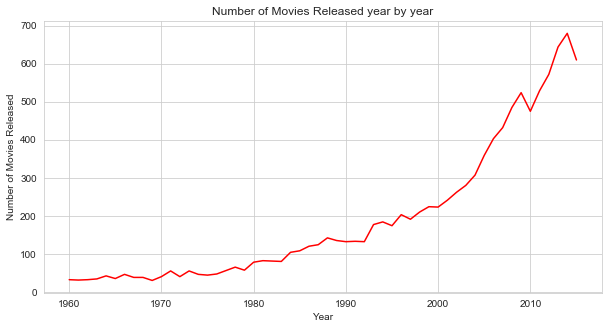

In [70]:
# Plot the data

#set style
sns.set_style('whitegrid')

# Set x-axis and y-axis data
# x is the year of movie release
x = movie_count.index

# y is count of number of movies released
y = movie_count

# Set size
plt.figure(figsize=(10, 5))

# Plot line chart 
plt.plot(x, y, color = 'r', label = 'mean')

# Set title and labels
plt.title('Number of Movies Released year by year')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released');

We can see that the number of movies released are increasing year by year. 
And the it is the accelerated growth since the curve is concave upward.


#### Question 2: Keywords Trends by Generation
Sort the movie release year and group the dataframe into generation.

In [71]:
# Sort the movie release year list.

year_data = data.release_year.unique()
year_data = np.sort(year_data)
year_data

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

In [72]:
# year list of 1960s
y1960s = year_data[:10]

# year list of 1970s
y1970s = year_data[10:20]

# year list of 1980s
y1980s = year_data[20:30]

# year list of 1990s
y1990s = year_data[30:40]

# year list of afer 2000
y2000 = year_data[40:]

For each generation dataframe, use the find_top_few to find out the most appeared keywords, then combine this result to a new dataframe.

In [73]:
# Year list for each generation
times = [y1960s, y1970s, y1980s, y1990s, y2000]

# Generation names
names = ['1960s', '1970s', '1980s', '1990s', 'after2000']

# Create an empty dataframe
summary = pd.DataFrame()

index = 0
# For each generation, do the following procedure
for year_data in times:
    # first filter dataframe with the selected generation, and store it to temporary dataframe
    temp_data = data[data.release_year.isin(year_data)] 
    
    # Apply the find_top_few function with the selected frame, using the result create a dataframe, store it to another temporary dataframe
    temp_data_2 = pd.DataFrame({'year' :names[index], 'top': find_top_few(temp_data.keywords,1)})
    
    # Append temp_data_2 to summary
    summary = summary.append(temp_data_2)
    index +=1
    
summary

,year,top
based on novel,1960s,16
based on novel,1970s,23
nudity,1980s,39
independent film,1990s,80
woman director,after2000,347


The list is keywords of most filmed movies in each generation. In 1960s and 1970s, the top keywords were based on novel. In 1980s, the top keyword was nudity. In 1990s, independent film became the top keyword. And after 2000, the movie featuring woman directors were released most.

Plot the data.

Text(0.5,1,'Keywords Trends by Generation')

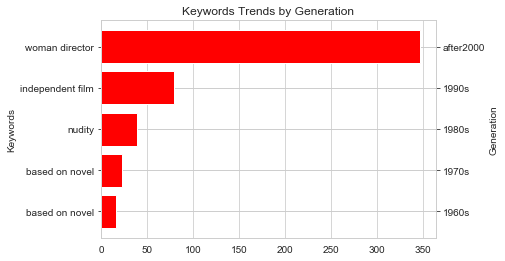

In [74]:
# Setting the positions
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']

keywords = summary.index

y_pos = np.arange(len(generation))
fig, ax = plt.subplots()

# Create another axis to present the right-side y axis labels
ax2 = ax.twinx()

# Setting y1: the keywords count
y1 = summary.top

# Setting y2 again to present the right-side y axis labels
y2 = summary.top

# Plot the bar
ax.barh(y_pos, y1, color = 'y')

# Set the left side y axis ticks position
ax.set_yticks(y_pos)

# Set the left side y axis tick label
ax.set_yticklabels(keywords)

# Set left side y axis label
ax.set_ylabel('Keywords')



# Set right side y axis label
ax2.set_ylabel('Generation')

# Plot the bar
ax2.barh(y_pos,y2, color = 'r')

# Set the right side y axis ticks position
ax2.set_yticks(y_pos)

# Set the right side y axis tick label
ax2.set_yticklabels(generation)

# Set title
ax.set_title('Keywords Trends by Generation')

We can see that the number of the keywords appeared changes from 16 to 347 by generation, and it is resonable since the trend is consistent with the number of movie released.


#### Question 3: Genres Trends by Generation
Use the same procedure as Question 2, first use the find_top_few to find out the most appeared genres, then combine this result to a new dataframe.

In [75]:
# Year list for each generation
times = [y1960s, y1970s, y1980s, y1990s, y2000]

# Generation names
names = ['1960s', '1970s', '1980s', '1990s', 'after2000']

# Create an empty dataframe
summary = pd.DataFrame()

index = 0
# For each generation, do the following procedure
for year_data in times:
    # first filter dataframe with the selected generation, and store it to temporary dataframe
    temp_data = data[data.release_year.isin(year_data)] 
    
    # Apply the find_top_few function with the selected frame, using the result create a dataframe, store it to another temporary dataframe
    temp_data_2 = pd.DataFrame({'year' :names[index], 'top': find_top_few(temp_data.genres,1)})
    
    # Append temp_data_2 to summary
    summary = summary.append(temp_data_2)
    index +=1
    
summary

,year,top
Drama,1960s,167
Drama,1970s,238
Comedy,1980s,428
Drama,1990s,862
Drama,after2000,3050


Text(0.5,1,'Genre Trends by Generation')

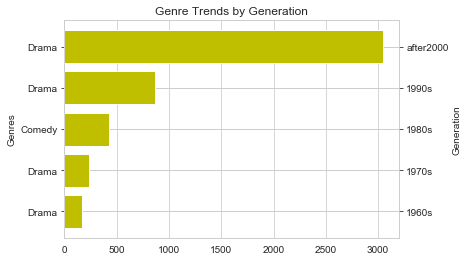

In [76]:
# Setting the positions
generation = ['1960s', '1970s', '1980s', '1990s', 'after2000']

genres = summary.index

y_pos = np.arange(len(generation))
fig, ax = plt.subplots()

# Create another axis to present the right-side y axis labels
ax2 = ax.twinx()

# Setting y1: the genre count
y1 = summary.top

# Setting y2 again to present the right-side y axis labels
y2 = summary.top

# Plot the bar
ax.barh(y_pos, y1, color = 'r')

# Set the left side y axis ticks position
ax.set_yticks(y_pos)

# Set the left side y axis tick label
ax.set_yticklabels(genres)

# Set left side y axis label
ax.set_ylabel('Genres')



# Set right side y axis label
ax2.set_ylabel('Generation')

# Plot the bar
ax2.barh(y_pos,y2, color = 'y')

# Set the right side y axis ticks position
ax2.set_yticks(y_pos)

# Set the right side y axis tick label
ax2.set_yticklabels(generation)


# Set title
ax.set_title('Genre Trends by Generation')# Setting the positions

We can see that the genre Drama are the most filmed in almost all generations. Only the 1980s are dominated by the comedy genre.

### Research 3:  Explore Summary
The number of movies released have been increasing year by year. And the it is in the accelerated growth trend.

In 1960s and 1970s, the top keywords was based on novel, which means movies with the keyword based on novel are released most.
In 1980s, the top keyword was nudity. In 1990s, independent film became the top keyword. And after 2000, the movies featuring woman director were released most.

The genre Drama are the most filmed in almost all generations. Only the 1980s are dominated by the comedy genre.

## Conclusions
The goal in the research is primary to explore three parts of questions:

#### Part one: General Exploration

At part one, some general questions were explored. Movie popularity trend has been growing from 1960. Movies with higher revenue level are directly proportional with higher popularity based on recent five years data. Besides, movies with higher revenue level don't have the significant high score rating in recent five years.


#### Part two: Find the Attributes associated with Successful Movies

Attributes like cast, genre, production, keywords etc., that are associated with high popularity movies are analysed in terms of different high budget categories and run time categories. It is found that attributes associated with high popularity movies are higher budget levels and longer run time. Cast associated with high popularity movies is Robin Williams, Director associated with high popularity movies is Steven Soderbergh, Genres, Keywords & Producers associated with high popularity movies are no different than that of unpopular movies.

Both runtime and budget didn't have obvious differences in high rating score. Low budget may have a higher rating or vice versa. 

It is found that the attributes that are associated with high voting averages are almost similar to the attributes that are associated with highly popular movies

#### Part three: Top Keywords and Genres Trends by Generation

It is observed that the number of movies released have been increasing year by year and that it is in the accelerated growth trend. In 1960s and 1970s, the top keywords were based on novel. In 1980s, the top keyword was nudity. In 1990s, independent film became the top keyword. And after 2000, the movies featuring woman director were released most.

The genre Drama are the most filmed in almost all generations. Only the 1980s were dominated by the comedy genre.

There is a lot of interesting information present in the dataset which can be explored in myriad of ways, some of which might provide some conclusive results.

#### Limitations
Data quality: It started with an assumption that zero values in revenue and budget column are missing. Zero valued revenue and budget data couldn't be deleted as it comprises more than 50% data. Some outliers have been found. As the popularity doesn't have an upperbound, it actually have the high probability of having outliers. 

###### First research
The distribution of popularity in different revenue levels in recent five years were analysed but the revenue levels were categorized based on their quantile. Whole revenue distributin is not calculated, so there may exist risks that the high revenue level still covers a wide of range, and may affect the final result. Analysis is provided based on data in the recent five years, while other years there could be different distributions.

###### Second research 
The attributes have been associated with successful (popularity & vote_averages) movies. Attributes of high revenue are not calcuated as it is assumed that high revenue levels are with higher popularity which is found in research one. There can be several other factors that would have been resulted in high revenue movies.

Budget levels and runtime level properties were also analyzed, again, limiting the data to quantile data and not year by year. The keywords data was split into independent words and was counted. There could also be another analysis while keeping the combination of the keywords as it is and comparing accross the most successful and least successful. For example, a director might be good at particular combination of keywords and that would have provided more insight. Number of votes are not considered, so the rating score may be a biased.

In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-tmdb-movie-dataset.ipynb'])

0